Credit Card Customer Churning

In [31]:
# Edit all the Markdown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
#
# PS: run the code after the "Technical Requirements" cell to obtain the versions of all imported packages.
# Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

Team
Robert Tapia
Lakshmi Varrier

Course SWENG 545 Data mining (Spring 2021)

In [32]:
#your code begins here

In [33]:
#!pip install openpyxl

In [34]:
# First, start with all imports that will be used throughout the notebook (consolidated for simplicity)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab
import sys
import itertools
import openpyxl

# Import from sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.model_selection import validation_curve, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics, svm, preprocessing, utils
from sklearn import datasets as ds
from openpyxl import load_workbook
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Ignore warnings (they are not errors)
import warnings
warnings.filterwarnings('ignore')

# We always want to see all columns
pd.set_option('display.max_columns', None)

In [35]:
#Return the whole dataset

#bank_frame = pd.read_excel(r"C:\Users\laksh\Desktop\SWENG545-DataMining\Data Mining Project\bank_churners.xlsx")


bank_frame = pd.read_excel(r"C:\Users\rjtap\OneDrive\Desktop\bank_churners.xlsx")
                       
        # Return all DataFrames
bank_frame

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,710202783,Existing Customer,33,M,2,Graduate,Married,$60K - $80K,Blue,13,3,3,3,1963.0,1721,242.0,0.680,1378,37,0.762,0.877,0.000303,0.99970
1,717998058,Existing Customer,26,M,0,Graduate,Single,Less than $40K,Blue,13,6,3,2,2585.0,2019,566.0,0.525,2644,40,0.481,0.781,0.000154,0.99985
2,779445108,Existing Customer,26,M,0,Graduate,Single,$40K - $60K,Blue,13,6,1,2,3290.0,1616,1674.0,0.466,2781,54,0.350,0.491,0.000047,0.99995
3,779149683,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,0.000047,0.99995
4,788728608,Existing Customer,34,M,0,High School,Married,$40K - $60K,Blue,13,3,3,2,3870.0,1394,2476.0,0.827,1588,36,0.714,0.360,0.000150,0.99985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,714418158,Existing Customer,63,F,0,Uneducated,Single,Less than $40K,Blue,56,2,2,2,7264.0,851,6413.0,0.814,3527,69,0.816,0.117,0.000100,0.99990
10123,816832383,Existing Customer,61,F,1,High School,Single,Less than $40K,Blue,56,3,2,2,3421.0,2266,1155.0,0.659,6932,75,0.744,0.662,0.000104,0.99990
10124,809169858,Existing Customer,62,M,2,Graduate,Single,$60K - $80K,Blue,56,2,3,2,18224.0,1383,16841.0,0.705,7728,93,0.576,0.076,0.000180,0.99982
10125,819109308,Existing Customer,62,M,0,Graduate,Divorced,$60K - $80K,Blue,56,1,3,3,6103.0,2517,3586.0,0.740,8080,92,0.704,0.412,0.000260,0.99974


In [36]:
# Data Cleaning
# Check for missing values

bank_frame.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [37]:
# drop all unneeded columns

bank_frame = bank_frame.drop(columns = 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
bank_frame = bank_frame.drop(columns = 'CLIENTNUM')
bank_frame = bank_frame.drop(columns = 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')
bank_frame = bank_frame.drop(columns = 'Card_Category')
bank_frame = bank_frame.drop(columns = 'Total_Relationship_Count')
bank_frame = bank_frame.drop(columns = 'Contacts_Count_12_mon')
bank_frame = bank_frame.drop(columns = 'Avg_Open_To_Buy')
bank_frame

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,33,M,2,Graduate,Married,$60K - $80K,13,3,1963.0,1721,0.680,1378,37,0.762,0.877
1,Existing Customer,26,M,0,Graduate,Single,Less than $40K,13,3,2585.0,2019,0.525,2644,40,0.481,0.781
2,Existing Customer,26,M,0,Graduate,Single,$40K - $60K,13,1,3290.0,1616,0.466,2781,54,0.350,0.491
3,Existing Customer,30,F,0,Graduate,Divorced,Unknown,13,1,7772.0,1890,0.754,2585,75,0.829,0.243
4,Existing Customer,34,M,0,High School,Married,$40K - $60K,13,3,3870.0,1394,0.827,1588,36,0.714,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,63,F,0,Uneducated,Single,Less than $40K,56,2,7264.0,851,0.814,3527,69,0.816,0.117
10123,Existing Customer,61,F,1,High School,Single,Less than $40K,56,2,3421.0,2266,0.659,6932,75,0.744,0.662
10124,Existing Customer,62,M,2,Graduate,Single,$60K - $80K,56,3,18224.0,1383,0.705,7728,93,0.576,0.076
10125,Existing Customer,62,M,0,Graduate,Divorced,$60K - $80K,56,3,6103.0,2517,0.740,8080,92,0.704,0.412


In [38]:
# return datasets split by number of month's on book

bank_frame_new = bank_frame[:847]
bank_frame_new

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,33,M,2,Graduate,Married,$60K - $80K,13,3,1963.0,1721,0.680,1378,37,0.762,0.877
1,Existing Customer,26,M,0,Graduate,Single,Less than $40K,13,3,2585.0,2019,0.525,2644,40,0.481,0.781
2,Existing Customer,26,M,0,Graduate,Single,$40K - $60K,13,1,3290.0,1616,0.466,2781,54,0.350,0.491
3,Existing Customer,30,F,0,Graduate,Divorced,Unknown,13,1,7772.0,1890,0.754,2585,75,0.829,0.243
4,Existing Customer,34,M,0,High School,Married,$40K - $60K,13,3,3870.0,1394,0.827,1588,36,0.714,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,Existing Customer,31,F,0,College,Married,Unknown,24,3,34516.0,2032,0.820,14544,104,0.705,0.059
843,Attrited Customer,43,F,3,Uneducated,Unknown,Less than $40K,24,2,8256.0,2416,0.696,8104,64,0.730,0.293
844,Attrited Customer,34,M,0,Graduate,Divorced,$80K - $120K,24,2,34516.0,400,0.202,5112,49,0.256,0.012
845,Existing Customer,37,F,3,Graduate,Divorced,Less than $40K,24,3,3727.0,995,0.743,14786,101,0.656,0.267


In [39]:
bank_frame_old = bank_frame [847:]
bank_frame_old

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
847,Existing Customer,44,M,3,High School,Unknown,$60K - $80K,25,3,1862.0,0,0.883,1226,34,0.789,0.000
848,Existing Customer,51,F,3,Unknown,Unknown,Less than $40K,25,2,9512.0,1082,0.701,1007,22,1.444,0.114
849,Existing Customer,41,M,1,Uneducated,Married,$60K - $80K,25,2,7984.0,1503,0.797,1734,39,1.167,0.188
850,Existing Customer,39,F,3,College,Single,Less than $40K,25,1,3920.0,2008,0.944,3178,53,0.656,0.512
851,Existing Customer,36,F,2,Unknown,Married,$40K - $60K,25,1,4789.0,1257,1.134,1534,29,0.933,0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,63,F,0,Uneducated,Single,Less than $40K,56,2,7264.0,851,0.814,3527,69,0.816,0.117
10123,Existing Customer,61,F,1,High School,Single,Less than $40K,56,2,3421.0,2266,0.659,6932,75,0.744,0.662
10124,Existing Customer,62,M,2,Graduate,Single,$60K - $80K,56,3,18224.0,1383,0.705,7728,93,0.576,0.076
10125,Existing Customer,62,M,0,Graduate,Divorced,$60K - $80K,56,3,6103.0,2517,0.740,8080,92,0.704,0.412


In [40]:
bank_frame_new = bank_frame_new.drop(columns = 'Dependent_count')
bank_frame_new = bank_frame_new.drop(columns = 'Credit_Limit')
bank_frame_new = bank_frame_new.drop(columns = 'Avg_Utilization_Ratio')
bank_frame_new = bank_frame_new.drop(columns = 'Total_Trans_Amt')
bank_frame_new = bank_frame_new.drop(columns = 'Total_Revolving_Bal')
bank_frame_new

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,33,M,Graduate,Married,$60K - $80K,13,3,0.680,37,0.762
1,Existing Customer,26,M,Graduate,Single,Less than $40K,13,3,0.525,40,0.481
2,Existing Customer,26,M,Graduate,Single,$40K - $60K,13,1,0.466,54,0.350
3,Existing Customer,30,F,Graduate,Divorced,Unknown,13,1,0.754,75,0.829
4,Existing Customer,34,M,High School,Married,$40K - $60K,13,3,0.827,36,0.714
...,...,...,...,...,...,...,...,...,...,...,...
842,Existing Customer,31,F,College,Married,Unknown,24,3,0.820,104,0.705
843,Attrited Customer,43,F,Uneducated,Unknown,Less than $40K,24,2,0.696,64,0.730
844,Attrited Customer,34,M,Graduate,Divorced,$80K - $120K,24,2,0.202,49,0.256
845,Existing Customer,37,F,Graduate,Divorced,Less than $40K,24,3,0.743,101,0.656


In [41]:
bank_frame_old = bank_frame_old.drop(columns = 'Dependent_count')
bank_frame_old = bank_frame_old.drop(columns = 'Customer_Age')
bank_frame_old = bank_frame_old.drop(columns = 'Gender')
bank_frame_old = bank_frame_old.drop(columns = 'Education_Level')
bank_frame_old = bank_frame_old.drop(columns = 'Marital_Status')
bank_frame_old = bank_frame_old.drop(columns = 'Income_Category')
bank_frame_old

,Attrition_Flag,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
847,Existing Customer,25,3,1862.0,0,0.883,1226,34,0.789,0.000
848,Existing Customer,25,2,9512.0,1082,0.701,1007,22,1.444,0.114
849,Existing Customer,25,2,7984.0,1503,0.797,1734,39,1.167,0.188
850,Existing Customer,25,1,3920.0,2008,0.944,3178,53,0.656,0.512
851,Existing Customer,25,1,4789.0,1257,1.134,1534,29,0.933,0.262
...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,56,2,7264.0,851,0.814,3527,69,0.816,0.117
10123,Existing Customer,56,2,3421.0,2266,0.659,6932,75,0.744,0.662
10124,Existing Customer,56,3,18224.0,1383,0.705,7728,93,0.576,0.076
10125,Existing Customer,56,3,6103.0,2517,0.740,8080,92,0.704,0.412


In [42]:
dummiesdata = pd.get_dummies(bank_frame_new.Attrition_Flag)

dummiesdata

bank_frame_new = pd.concat([bank_frame_new, dummiesdata], axis=1).drop(['Attrition_Flag'], axis=1)



In [43]:
bank_frame_new

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrited Customer,Existing Customer
0,33,M,Graduate,Married,$60K - $80K,13,3,0.680,37,0.762,0,1
1,26,M,Graduate,Single,Less than $40K,13,3,0.525,40,0.481,0,1
2,26,M,Graduate,Single,$40K - $60K,13,1,0.466,54,0.350,0,1
3,30,F,Graduate,Divorced,Unknown,13,1,0.754,75,0.829,0,1
4,34,M,High School,Married,$40K - $60K,13,3,0.827,36,0.714,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
842,31,F,College,Married,Unknown,24,3,0.820,104,0.705,0,1
843,43,F,Uneducated,Unknown,Less than $40K,24,2,0.696,64,0.730,1,0
844,34,M,Graduate,Divorced,$80K - $120K,24,2,0.202,49,0.256,1,0
845,37,F,Graduate,Divorced,Less than $40K,24,3,0.743,101,0.656,0,1


In [44]:
dummiesdata = pd.get_dummies(bank_frame_old.Attrition_Flag)

dummiesdata

bank_frame_old = pd.concat([bank_frame_old, dummiesdata], axis=1).drop(['Attrition_Flag'], axis=1)

In [45]:
bank_frame_old

,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
847,25,3,1862.0,0,0.883,1226,34,0.789,0.000,0,1
848,25,2,9512.0,1082,0.701,1007,22,1.444,0.114,0,1
849,25,2,7984.0,1503,0.797,1734,39,1.167,0.188,0,1
850,25,1,3920.0,2008,0.944,3178,53,0.656,0.512,0,1
851,25,1,4789.0,1257,1.134,1534,29,0.933,0.262,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,56,2,7264.0,851,0.814,3527,69,0.816,0.117,0,1
10123,56,2,3421.0,2266,0.659,6932,75,0.744,0.662,0,1
10124,56,3,18224.0,1383,0.705,7728,93,0.576,0.076,0,1
10125,56,3,6103.0,2517,0.740,8080,92,0.704,0.412,0,1


In [46]:
bank_frame_old = bank_frame_old.rename(columns={'Attrited Customer': 'Attrited_Customer', 'Existing Customer': 'Existing_Customer'})

In [47]:
bank_frame_new = bank_frame_new.rename(columns={'Attrited Customer': 'Attrited_Customer', 'Existing Customer': 'Existing_Customer'})

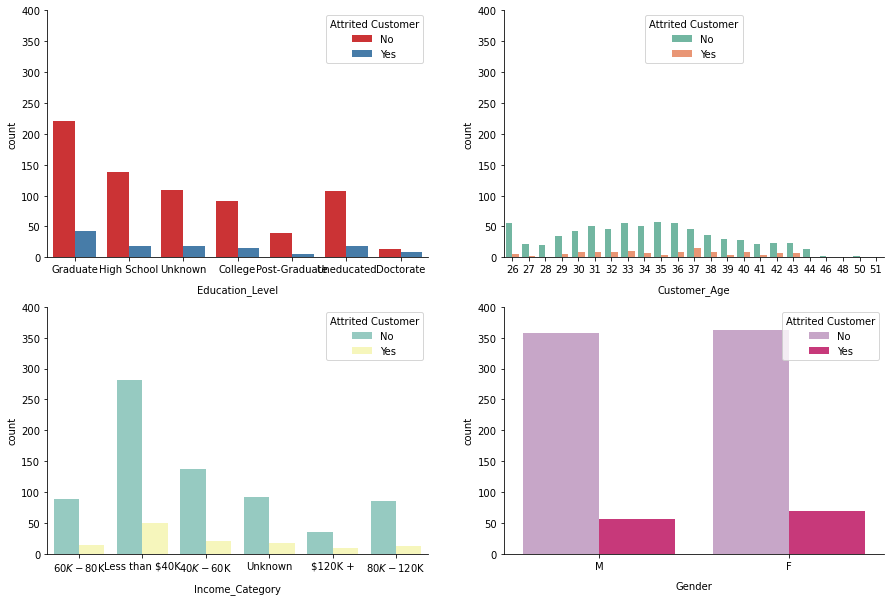

In [48]:
#analyze the relationship between categorical variables and the target variable
categorical_labels = [['Education_Level', 'Customer_Age'], ['Income_Category', 'Gender']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd']]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature, hue='Attrited_Customer', palette=color, data=bank_frame_new, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
        ax1.set_ylim(0, 400)
        ax1.legend(title='Attrited Customer', labels= ['No', 'Yes'])
       
sns.despine()

In [49]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 

In [50]:
ohe_output = onehot_encoder.fit_transform(bank_frame_new[['Gender','Education_Level','Marital_Status','Income_Category']])

In [51]:
ohe_output

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [52]:
onehot_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
        'Uneducated', 'Unknown'], dtype=object),
 array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object),
 array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
        'Less than $40K', 'Unknown'], dtype=object)]

In [53]:
#one_hot_encode_output1 = pd.DataFrame(ohe_output,columns=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category'])
#one_hot_encode_output1 

In [54]:
#att_flag_encoded = label_encoder.fit_transform(bank_frame_new['Attrition_Flag'])
#att_flag_df = pd.DataFrame(att_flag_encoded,columns = ["Att_flag_encoded"])
#bank_frame_new = pd.concat([bank_frame_new, att_flag_df], axis=1).drop(['Attrition_Flag'], axis=1)

gender_encoded = label_encoder.fit_transform(bank_frame_new['Gender'])
gender_df = pd.DataFrame(gender_encoded,columns=["Gender_Categ"])
bank_frame_new = pd.concat([bank_frame_new, gender_df], axis=1).drop(['Gender'], axis=1)

In [55]:
education_lvl_encoded = label_encoder.fit_transform(bank_frame_new['Education_Level'])
education_lvl_df = pd.DataFrame(education_lvl_encoded,columns=["Education_Level_Categ"])
bank_frame_new = pd.concat([bank_frame_new, education_lvl_df], axis=1).drop(['Education_Level'], axis=1)


In [56]:
marital_encoded = label_encoder.fit_transform(bank_frame_new['Marital_Status'])
marital_df = pd.DataFrame(marital_encoded,columns=["Marital_status_Categ"])
bank_frame_new = pd.concat([bank_frame_new, marital_df], axis=1).drop(['Marital_Status'], axis=1)


In [57]:
income_category_encoded = label_encoder.fit_transform(bank_frame_new['Income_Category'])
income_category_df = pd.DataFrame(income_category_encoded,columns=["Income_Categ"])
bank_frame_new = pd.concat([bank_frame_new, income_category_df], axis=1).drop(['Income_Category'], axis=1)


In [58]:
bank_frame_new = bank_frame_new.rename(columns={'Attrited Customer': 'Attrited_Customer', 'Existing Customer': 'Existing_Customer'})

In [59]:
bank_frame_new

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrited_Customer,Existing_Customer,Gender_Categ,Education_Level_Categ,Marital_status_Categ,Income_Categ
0,33,13,3,0.680,37,0.762,0,1,1,2,1,2
1,26,13,3,0.525,40,0.481,0,1,1,2,2,4
2,26,13,1,0.466,54,0.350,0,1,1,2,2,1
3,30,13,1,0.754,75,0.829,0,1,0,2,0,5
4,34,13,3,0.827,36,0.714,0,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
842,31,24,3,0.820,104,0.705,0,1,0,0,1,5
843,43,24,2,0.696,64,0.730,1,0,0,5,3,4
844,34,24,2,0.202,49,0.256,1,0,1,2,0,3
845,37,24,3,0.743,101,0.656,0,1,0,2,0,4


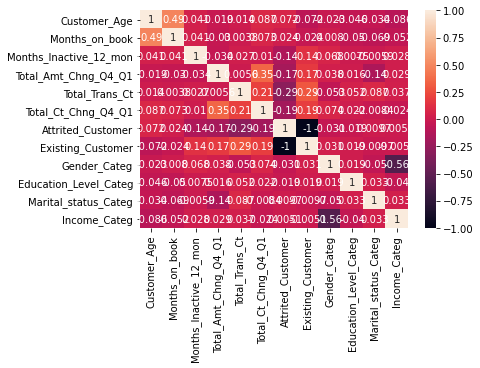

In [61]:
bank_frame_new_corr = bank_frame_new.corr()

sns.heatmap(bank_frame_new_corr, annot=True)
plt.show()

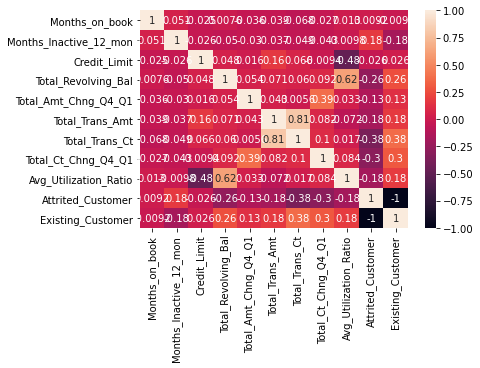

In [62]:
bank_frame_old_corr = bank_frame_old.corr()

sns.heatmap(bank_frame_old_corr, annot=True)
plt.show()

In [63]:
bank_frame_old = bank_frame_old.rename(columns={'Attrited Customer': 'Attrited_Customer', 'Existing Customer': 'Existing_Customer'})

In [64]:
bank_frame_old

,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited_Customer,Existing_Customer
847,25,3,1862.0,0,0.883,1226,34,0.789,0.000,0,1
848,25,2,9512.0,1082,0.701,1007,22,1.444,0.114,0,1
849,25,2,7984.0,1503,0.797,1734,39,1.167,0.188,0,1
850,25,1,3920.0,2008,0.944,3178,53,0.656,0.512,0,1
851,25,1,4789.0,1257,1.134,1534,29,0.933,0.262,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,56,2,7264.0,851,0.814,3527,69,0.816,0.117,0,1
10123,56,2,3421.0,2266,0.659,6932,75,0.744,0.662,0,1
10124,56,3,18224.0,1383,0.705,7728,93,0.576,0.076,0,1
10125,56,3,6103.0,2517,0.740,8080,92,0.704,0.412,0,1


In [65]:
count2 = bank_frame_old.groupby(["Months_on_book"]).Attrited_Customer.sum().reset_index()
count3 = bank_frame_old.groupby(['Total_Trans_Ct']).Attrited_Customer.sum().reset_index()
count1 = bank_frame_new.groupby(["Customer_Age"]).Attrited_Customer.sum().reset_index()
count = bank_frame_new.groupby(["Months_on_book"]).Attrited_Customer.sum().reset_index()



Now that the data has been imported into DataFrames, we can do some exploration.
First, we will focus on Data Visualization to better understand the original dataset overall.



,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited_Customer,Existing_Customer
847,25,3,1862.0,0,0.883,1226,34,0.789,0.000,0,1
848,25,2,9512.0,1082,0.701,1007,22,1.444,0.114,0,1
849,25,2,7984.0,1503,0.797,1734,39,1.167,0.188,0,1
850,25,1,3920.0,2008,0.944,3178,53,0.656,0.512,0,1
851,25,1,4789.0,1257,1.134,1534,29,0.933,0.262,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,56,2,7264.0,851,0.814,3527,69,0.816,0.117,0,1
10123,56,2,3421.0,2266,0.659,6932,75,0.744,0.662,0,1
10124,56,3,18224.0,1383,0.705,7728,93,0.576,0.076,0,1
10125,56,3,6103.0,2517,0.740,8080,92,0.704,0.412,0,1


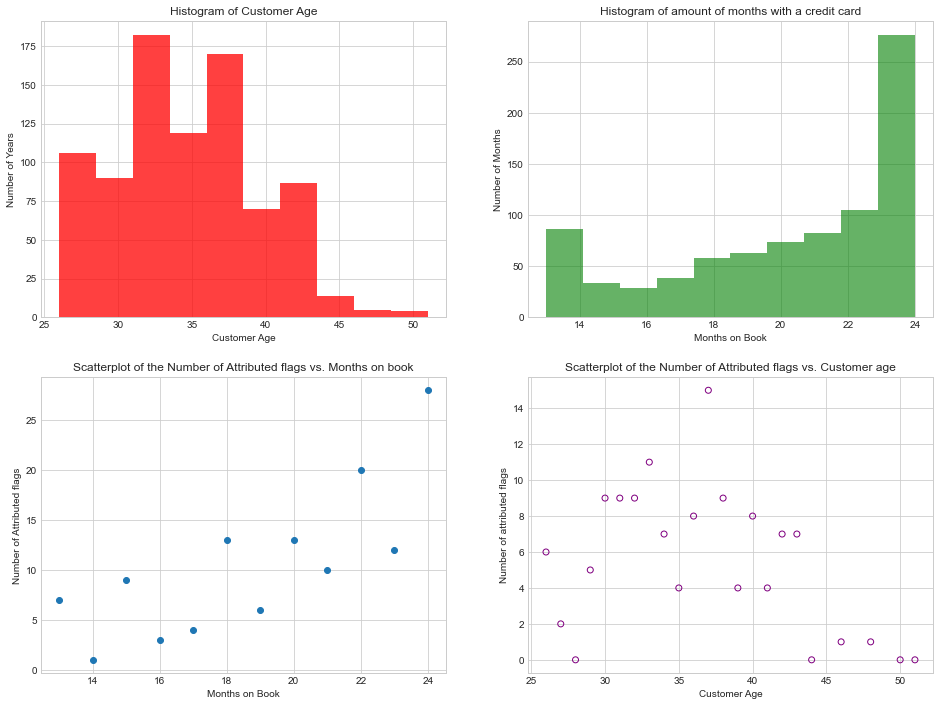

In [66]:
# Define a main function for visualization of the initial dataset
def main(bank_frame_new):
    
    # Handle exceptions, just in case - even though there should be no issues as long as the above cell ran successfully
    try:
    
        # Print an initial description to the user
        print("Now that the data has been imported into DataFrames, we can do some exploration.")
        print("First, we will focus on Data Visualization to better understand the original dataset overall.")
        print()
        
        # Call a function to initialize the plot
        settings_initializer1()

        # Call a function to visualize the initial dataset
        bank_new_visualizer(bank_frame_new)

        # Return to take a look at the (consolidated) raw data 
        return bank_frame_old

    # Catch all exceptions, if any should occur
    except Exception as err:
        
        # Show the error message
        print(err)

# Define a function to adjust display settings
def settings_initializer1():
    
    # Adjust display settings
    plt.rc('figure', figsize=(16, 12))
    plt.style.use('seaborn-whitegrid')
    
# Define a function to plot some visualizations from the DataFrame
def bank_new_visualizer(bank_frame_new):
    
    # Initialize a figure with four subplots
    fig = plt.figure()
    axis1 = fig.add_subplot(2, 2, 1)
    axis2 = fig.add_subplot(2, 2, 2)
    axis3 = fig.add_subplot(2, 2, 3)
    axis4 = fig.add_subplot(2, 2, 4)
    
    axis1.hist(bank_frame_new['Customer_Age'], bins=10, color='r', alpha=0.75)
    axis1.set_title('Histogram of Customer Age')
    axis1.set(xlabel='Customer Age', ylabel='Number of Years')

    
    axis2.hist(bank_frame_new['Months_on_book'].astype(float), bins=10, color='g', alpha=0.6)
    axis2.set_title('Histogram of amount of months with a credit card')
    axis2.set(xlabel='Months on Book', ylabel='Number of Months')

    
    axis3.scatter(count['Months_on_book'], count['Attrited_Customer'])
    axis3.set_title('Scatterplot of the Number of Attributed flags vs. Months on book')
    axis3.set(xlabel='Months on Book', ylabel='Number of Attributed flags')

  
    axis4.scatter(count1['Customer_Age'], count1['Attrited_Customer'], facecolors='none', edgecolors='purple', marker='o')
    axis4.set_title('Scatterplot of the Number of Attributed flags vs. Customer age')
    axis4.set(xlabel='Customer Age', ylabel='Number of attributed flags')

# Call the main function
main(bank_frame_new)

Now that the data has been imported into DataFrames, we can do some exploration.
First, we will focus on Data Visualization to better understand the original dataset overall.



,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited_Customer,Existing_Customer
847,25,3,1862.0,0,0.883,1226,34,0.789,0.000,0,1
848,25,2,9512.0,1082,0.701,1007,22,1.444,0.114,0,1
849,25,2,7984.0,1503,0.797,1734,39,1.167,0.188,0,1
850,25,1,3920.0,2008,0.944,3178,53,0.656,0.512,0,1
851,25,1,4789.0,1257,1.134,1534,29,0.933,0.262,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,56,2,7264.0,851,0.814,3527,69,0.816,0.117,0,1
10123,56,2,3421.0,2266,0.659,6932,75,0.744,0.662,0,1
10124,56,3,18224.0,1383,0.705,7728,93,0.576,0.076,0,1
10125,56,3,6103.0,2517,0.740,8080,92,0.704,0.412,0,1


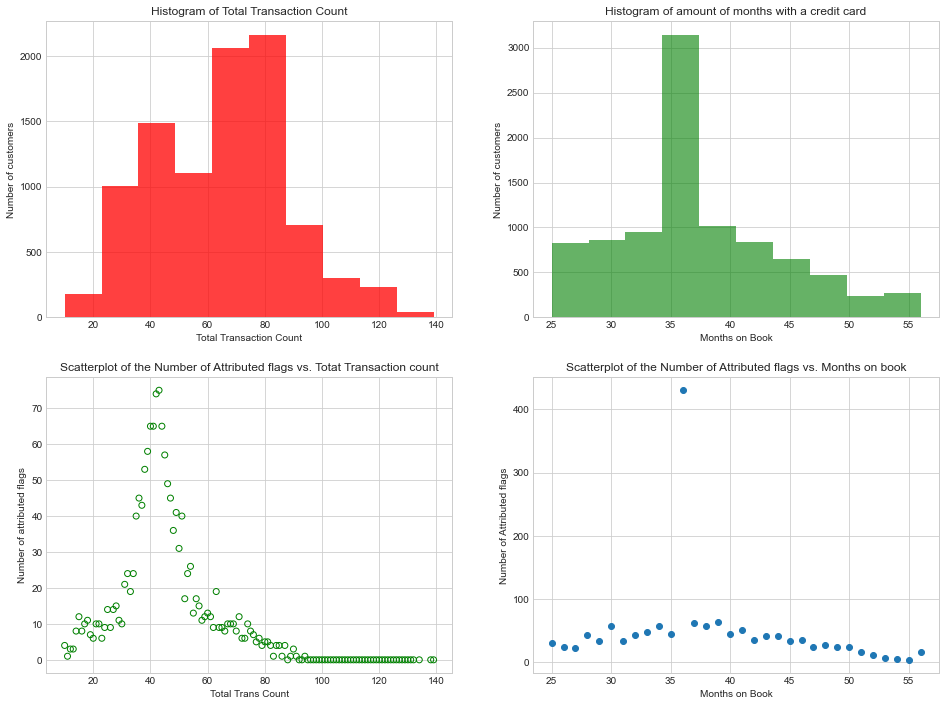

In [67]:
# Define a main function for visualization of the initial dataset
def main(bank_frame_old):
    
    # Handle exceptions, just in case - even though there should be no issues as long as the above cell ran successfully
    try:
    
        # Print an initial description to the user
        print("Now that the data has been imported into DataFrames, we can do some exploration.")
        print("First, we will focus on Data Visualization to better understand the original dataset overall.")
        print()
        
        # Call a function to initialize the plot
        settings_initializer1()

        # Call a function to visualize the initial dataset
        bank_new_visualizer(bank_frame_old)

        # Return to take a look at the (consolidated) 
        return bank_frame_old

    # Catch all exceptions, if any should occur
    except Exception as err:
        
        # Show the error message
        print(err)

# Define a function to adjust display settings
def settings_initializer1():
    
    # Adjust display settings
    plt.rc('figure', figsize=(16, 12))
    plt.style.use('seaborn-whitegrid')
    
# Define a function to plot some visualizations from the DataFrame
def bank_new_visualizer(bank_frame_old):
    
    # Initialize a figure with four subplots
    fig = plt.figure()
    axis1 = fig.add_subplot(2, 2, 1)
    axis2 = fig.add_subplot(2, 2, 2)
    axis3 = fig.add_subplot(2, 2, 3)
    axis4 = fig.add_subplot(2, 2, 4)
    
    axis1.hist(bank_frame_old['Total_Trans_Ct'], bins=10, color='r', alpha=0.75)
    axis1.set_title('Histogram of Total Transaction Count')
    axis1.set(xlabel='Total Transaction Count', ylabel='Number of customers')

   
    axis2.hist(bank_frame_old['Months_on_book'].astype(float), bins=10, color='g', alpha=0.6)
    axis2.set_title('Histogram of amount of months with a credit card')
    axis2.set(xlabel='Months on Book', ylabel='Number of customers')

    axis3.scatter(count3['Total_Trans_Ct'], count3['Attrited_Customer'], facecolors='none', edgecolors='green', marker='o')
    axis3.set_title('Scatterplot of the Number of Attributed flags vs. Totat Transaction count')
    axis3.set(xlabel='Total Trans Count', ylabel='Number of attributed flags')

    axis4.scatter(count2['Months_on_book'], count2['Attrited_Customer'])
    axis4.set_title('Scatterplot of the Number of Attributed flags vs. Months on book')
    axis4.set(xlabel='Months on Book', ylabel='Number of Attributed flags')

  
   
# Call the main function
main(bank_frame_old)

In [68]:
bank_churn = bank_frame_new.copy()

bank_churn['Attrited_Customer'] = bank_frame_new['Attrited_Customer'].apply(lambda x: 'successful' if x == 1 else 'unsuccessful')
 

Accuracy: 87.06%



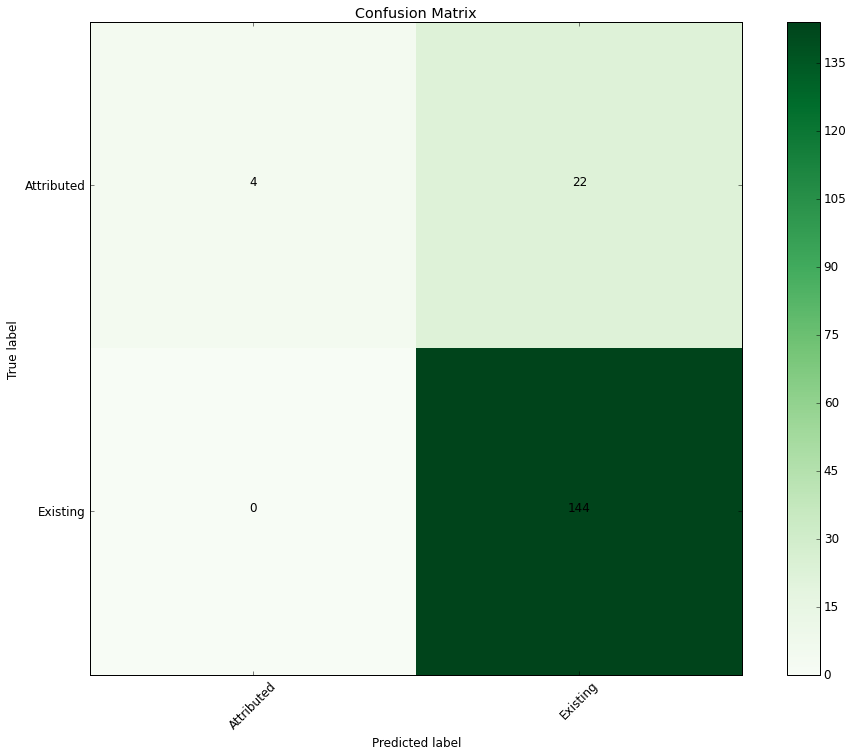

In [69]:
# Define a main function for the modeling
def main():
    
    # Handle exceptions, just in case - even though there should be no issues as long as the above cells ran successfully
    try:
        
         
        # Variable declarations and initialization at the top level
        X = pd.DataFrame()
        y = pd.DataFrame()
        X_train = pd.DataFrame()
        X_test = pd.DataFrame()
        y_train = pd.DataFrame()
        y_test = pd.DataFrame()
    
        # Call a function to set up the data for modeling
        X, y, X_train, X_test, y_train, y_test = data_setter(bank_churn)       
     
        y_predict, accuracy = log_regressor(X_train, y_train, X_test, y_test)

        # Compute confusion matrix
        success_matrix = confusion_matrix(y_test, y_predict)

        # Call a function to plot the confusion matrix
        matrix_plotter(success_matrix, classes=['Attributed','Existing'], title='Confusion Matrix')

        # Display accuracy
        print("Accuracy: ",format(accuracy*100, '.2f'), '%', sep='')
       
        print()
        
    # Catch all exceptions, if any should occur
    except Exception as err:
        
            #Show the error message
        print(err)
        
        
# Define a function to set up the data
def data_setter(bank_churn):
    
    # Create a list of features from the bank_churn DataFrame to use for a classification model
    classification_feature_list = list(bank_churn.columns.values.tolist())
    classification_feature_list.remove('Attrited_Customer')
    classification_feature_list.remove('Existing_Customer')

    # Assign values to X and y variables
    X = bank_churn[classification_feature_list]
    y = bank_churn['Attrited_Customer']

    # Split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Return outputs for use in other functions
    return X, y, X_train, X_test, y_train, y_test       

# Define a function for Logistic Regression modeling
def log_regressor(X_train, y_train, X_test, y_test):
    
    # Use Logistic Regression as a model for Binary classification 
    regressor = LogisticRegression()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make prediction
    y_predict = regressor.predict(X_test)
    
    # Calculate accuracy
    accuracy = regressor.score(X_test, y_test)
    
    # Return prediction
    return y_predict, accuracy


# Define a function to plot a Confusion Matrix
def matrix_plotter(cm, classes, title='Confusion Matrix', normalize=False):

    # Plot the figure in the classic style
    plt.figure()
    plt.style.use('classic')
    
    # Plot nearest interpolation with green colorscheme
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    
    # Add the title and appropriate tickmarks/labels
    tick_marks = [0,1]
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)
    
    # Show that sweet bar of color on the side
    plt.colorbar()
    
    # Label the axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Display the number of true positives, false positives, true negatives, and false negatives
    for a, b in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(b, a, format(cm[a, b], 'd'), horizontalalignment="center")

# Call the main function
main()

In [70]:
#Normalize the data

bank_frame_new = StandardScaler().fit_transform(bank_frame_new)

In [71]:
#Dimensionality Reduction

pca = PCA(n_components=2)
pca_bank_new = pca.fit_transform(bank_frame_new)


In [72]:
pca_bank_new.shape

(847, 2)

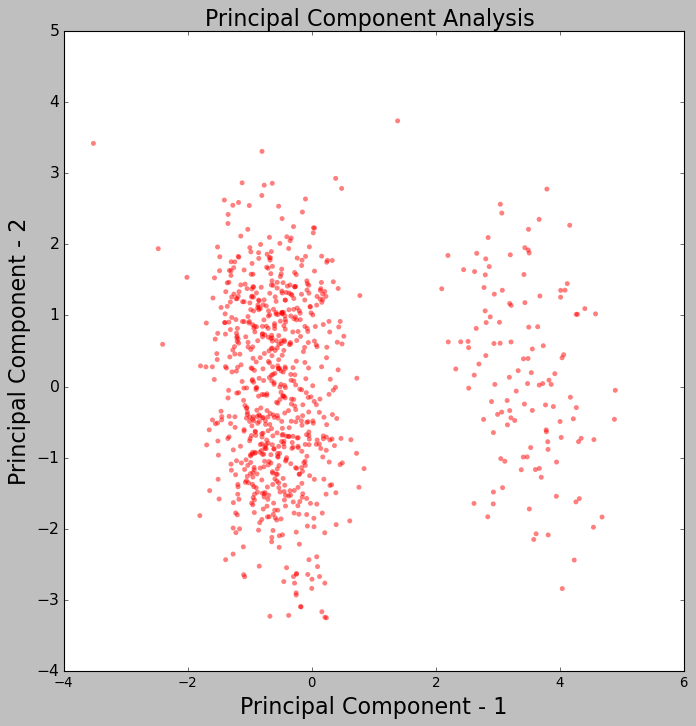

In [73]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis ",fontsize=20)
plt.scatter(pca_bank_new[:, 0], pca_bank_new[:, 1], c= "r",
            edgecolor='none', alpha=0.5)

In [74]:
#K-means clustering for Old and New Customers

In [75]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++').fit(pca_bank_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[3377.702651850714,
 1640.406193973229,
 790.5217573305354,
 636.8675000468908,
 504.0445345014624,
 428.53428289577766,
 381.1176844003548,
 334.2334597528701,
 300.893932921731]

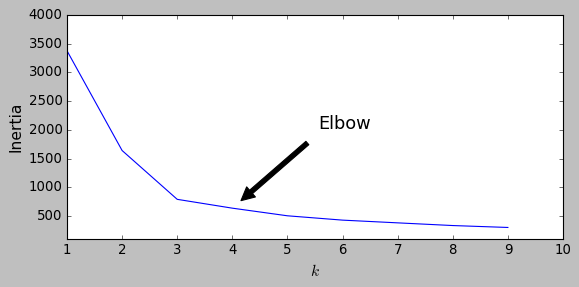

In [76]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 100, 4000])
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [77]:
bank_frame_old = StandardScaler().fit_transform(bank_frame_old)

In [78]:
pca = PCA(n_components=2)
pca_bank_old = pca.fit_transform(bank_frame_old)

In [79]:
pca_bank_old.shape

(9280, 2)

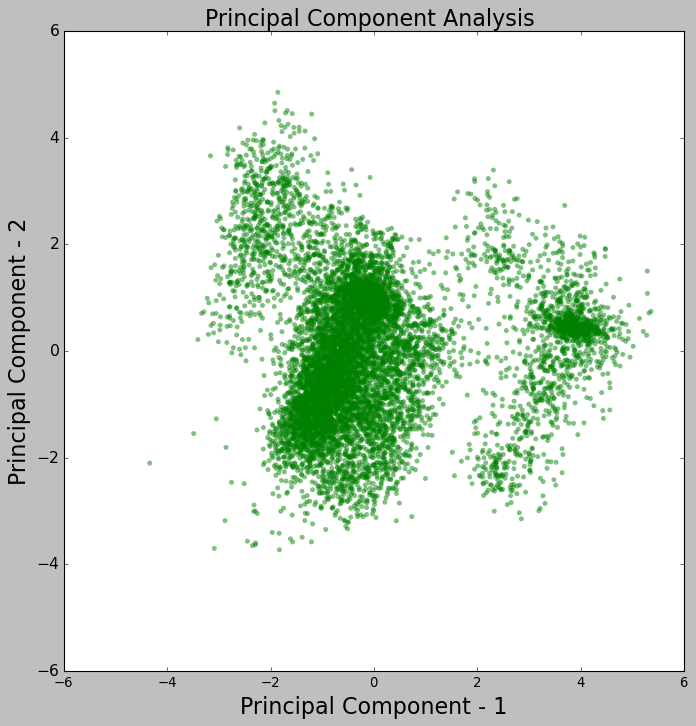

In [80]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis ",fontsize=20)
plt.scatter(pca_bank_old[:, 0], pca_bank_old[:, 1], c= "g",
            edgecolor='none', alpha=0.5)

In [81]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++').fit(pca_bank_old)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[43219.048716063066,
 23031.710994518573,
 13081.412485063875,
 9410.352535996713,
 7885.413282933117,
 6548.042406425596,
 5524.72128763508,
 4881.349640870296,
 4255.511093467335]

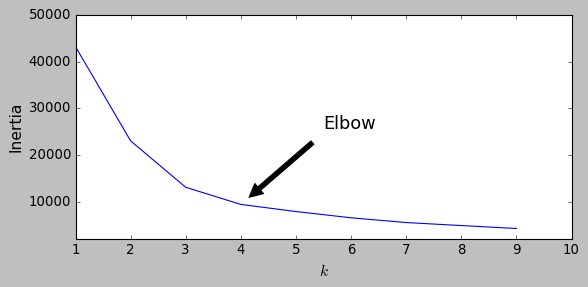

In [82]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 2000, 50000])
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [83]:
#K-Means Clustering

In [84]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pca_bank_new)

In [85]:
kmeans.cluster_centers_

array([[-0.6006038 , -0.36914228],
       [ 3.43725181,  0.15610471],
       [-0.63841899,  1.27294663],
       [-0.51186535, -1.72364263]])

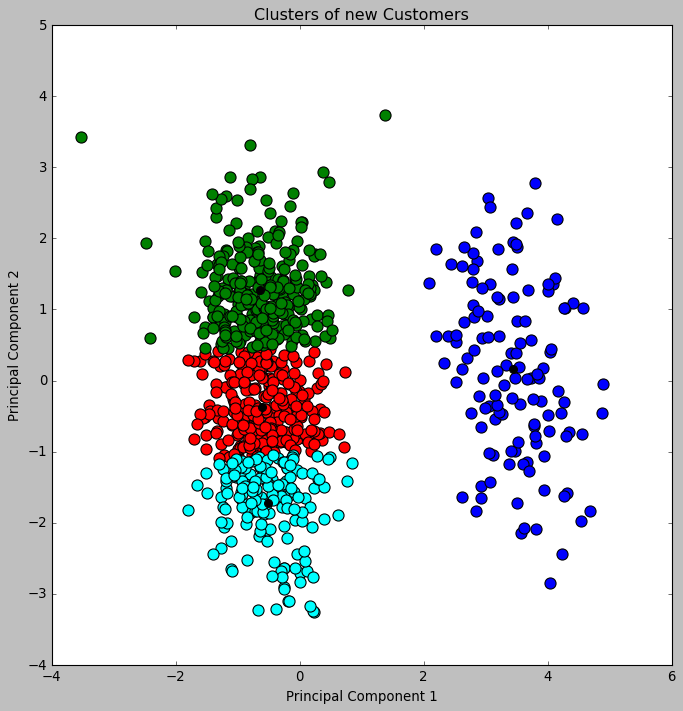

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(pca_bank_new[y_kmeans == 0, 0], pca_bank_new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_bank_new[y_kmeans == 1, 0], pca_bank_new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_bank_new[y_kmeans == 2, 0], pca_bank_new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_bank_new[y_kmeans == 3, 0], pca_bank_new[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of new Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pca_bank_old)

In [88]:
kmeans.cluster_centers_

array([[-0.15947895,  0.65817637],
       [-0.75455301, -1.21789946],
       [ 3.42089957,  0.14025759],
       [-1.90477888,  2.31469499]])

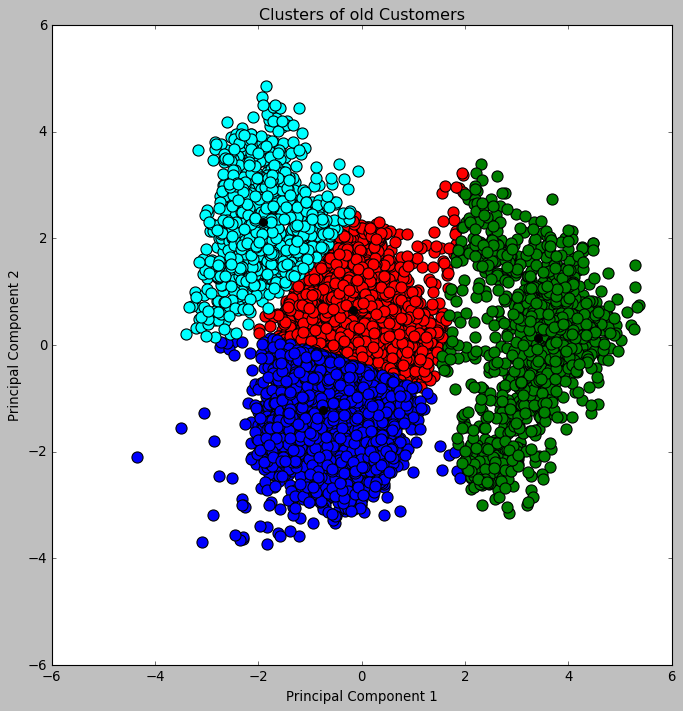

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(pca_bank_old[y_kmeans == 0, 0], pca_bank_old[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_bank_old[y_kmeans == 1, 0], pca_bank_old[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_bank_old[y_kmeans == 2, 0], pca_bank_old[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_bank_old[y_kmeans == 3, 0], pca_bank_old[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of old Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [90]:
#DBSCAN


In [91]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [92]:
#For New Customers

dbscan_bank_new = DBSCAN(eps = 0.05, min_samples = 4).fit(pca_bank_new) 
labels = dbscan_bank_new.labels_ 

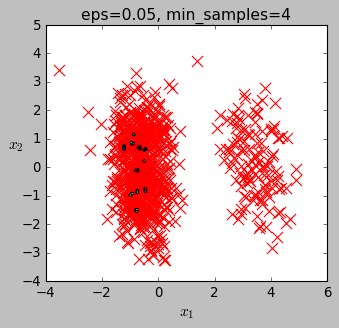

In [93]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plot_dbscan(dbscan_bank_new, pca_bank_new, size=100)

plt.show()


In [94]:
#For Old Customers

dbscan_bank_old = DBSCAN(eps = 0.05, min_samples = 4).fit(pca_bank_old) 
labels = dbscan_bank_old.labels_ 

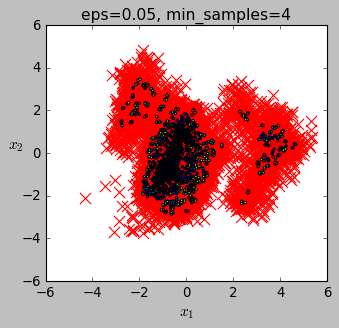

In [95]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plot_dbscan(dbscan_bank_old, pca_bank_old, size=100)

plt.show()